<a href="https://colab.research.google.com/github/yeoauqt/229351/blob/main/229351_LAB05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 4 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้น share แล้วส่ง link ใน mango.cmu.ac.th

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้ หรือรันโค้ดข้างล่าง
https://donlapark.pages.dev/229351/data/Auto.csv  

In [1]:
!wget https://donlapark.pages.dev/229351/data/Auto.csv

--2025-07-24 02:11:23--  https://donlapark.pages.dev/229351/data/Auto.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18079 (18K) [text/csv]
Saving to: ‘Auto.csv’

Auto.csv            100%[===================>]  17.66K  --.-KB/s    in 0s      

2025-07-24 02:11:23 (87.2 MB/s) - ‘Auto.csv’ saved [18079/18079]



In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
auto_df = pd.read_csv('Auto.csv',na_values=["?"])

# ลบแถวที่มี missing values
auto_df = auto_df.dropna()
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


* Predictor: `horsepower` $X = [x_1,x_2,\ldots,x_n]$
* Response: `mpg` $y = [y_1,y_2,\ldots,y_n]$
* สมการ $\hat{y}_i = \hat{\beta}_0+\hat{\beta}_1x_i, \ \ \ \ $     $ i=1,2,\ldots,n$  

In [5]:
X = auto_df['horsepower']
y = auto_df['mpg']

คำนวณสัมประสิทธิ์ $\hat{\beta}_0,\hat{\beta}_1$ ด้วยสูตร
\begin{align*}
\hat{\beta}_1 &= \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2} \\
&= \frac{\text{Cov}(X,y)}{\text{Var}(X)}\\
\hat{\beta}_0 &= \bar{y}-\hat{\beta}_1\bar{x}
\end{align*}
  
ใช้คำสั่ง $\texttt{np.cov(X,y)}=\begin{pmatrix}
\text{Var}(X)  & \text{Cov}(X,y) \\
\text{Cov}(y,X)  & \text{Var}(y)
\end{pmatrix}
$ สำหรับ covariance matrix ระหว่างเวกเตอร์ $\texttt{X}$ และ $\texttt{y}$  
ใช้คำสั่ง $\texttt{np.mean(X)}$ และ $\texttt{np.mean(y)}$ สำหรับค่าเฉลี่ยของเวกเตอร์ $\texttt{X}$ และ $\texttt{y}$

#### Exercise 1:

- เติมโค้ดในฟังก์ชัน `linear_model` ที่คำนวณค่าสัมประสิทธิ์ (coefficients) จากข้อมูล `X` และ `y`
- เติมโค้ดในฟังก์ชัน `predict` ที่คำนวณค่าทำนาย จากข้อมูลตัวแปรต้น `X` และสัมประสิทธิ์ของโมเดล `beta_0` และ `beta_1`

In [22]:
# Let's start by implementing linear regression from scratch
# using numpy linear algebra

def linear_model(X, y):
    """X: numpy array เวกเตอร์ของตัวแปรต้น"""
    """y: numpy array เวกเตอร์ของตัวแปรตาม"""
    cov_ = np.cov(X, y)

    X_mean = np.mean(X)
    y_mean = np.mean(y)

    beta_1 = cov_[0,1]/cov_[0,0]
    beta_0 = np.mean(y) - beta_1*np.mean(X)

    """Return: (beta_0 , beta_1) <-- tuple ของสัมประสิทธิ์"""

    #TODO: COMPLETE THE FUNCTION

    return beta_0 , beta_1

def predict(beta_0 , beta_1, X):
    """beta_0: ค่าตัดแกน"""
    """beta_1: ความชัน"""
    """X: เวกเตอร์ของตัวแปรต้น (Numpy หรือ Pandas)"""
    """Return: เวกเตอร์ของค่าทำนาย [y^_1, y^_2, ..., y^_n]"""

    y_pred = beta_0 + beta_1*X

    return y_pred
    #TODO: COMPLETE THE FUNCTION



In [23]:
beta_0, beta_1 = linear_model(X, y)
y_pred = predict(beta_0 , beta_1, X)

print(beta_0,beta_1)

39.93586102117045 -0.1578447333536535


In [24]:
# นับจำนวนข้อมูล

print(y.shape)

n = y.shape[0]
print(n)

(392,)
392


#### Exercise 2: คำนวณ Residual Sum of Squares (RSS)
$$ \text{RSS} = \sum_{i=1}^n (y_i-\hat{y}_i)^2 $$
โดยใช้คำสั่งต่อไปนี้

$\texttt{np.sum}([x_1,x_2,...,x_n])=x_1+x_2+...+x_n$

$\texttt{np.square}([x_1,x_2,...,x_n])=[x_1^2,x^2_2,...,x^2_n]$

In [25]:
# TODO: Calculate Residual Sum of Squares
RSS = np.sum(np.square(y-y_pred))

print(RSS)

9385.915871932419


#### Exercise 3: คำนวณ Residual Standard Error (RSE)  
$$  \text{RSE} = \sqrt{\frac{\text{RSS}}{n-2}} $$

In [30]:
# TODO: Calculate Residual Standard Error
RSE = np.sqrt(RSS/(n-2))

print(RSE)

4.90575691954594


#### Exercise 4: คำนวณ Standard Error (SE)  
\begin{align*}
\text{SE}(\hat{\beta}_0) &= \text{RSE}\sqrt{\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i=1}^n (x_i-\bar{x})^2}} \\
\text{SE}(\hat{\beta}_1) &= \text{RSE}\sqrt{\frac{1}{\sum_{i=1}^n (x_i-\bar{x})^2}}
\end{align*}

In [31]:
# TODO: Calculate the standard error of each coefficients

# SE(β₀)
SE_beta_0 = RSE*np.sqrt((1/n)+np.square(np.mean(X))/np.sum(np.square(X-np.mean(X))))

# SE(β₁)
SE_beta_1 = RSE*np.sqrt(1/np.sum(np.square(X-np.mean(X))))

print('SE(β₀): ', SE_beta_0)
print('SE(β₁): ', SE_beta_1)

SE(β₀):  0.7174986555545264
SE(β₁):  0.006445500517685034


#### Exercise 5: คำนวณขอบล่าง (lower) และขอบบน (upper) ของ confidence interval
$$I_i = [\hat{\beta}_i-2\cdot\text{SE}(\hat{\beta}_i),\hat{\beta}_i+2\cdot\text{SE}(\hat{\beta}_i)]$$

In [33]:
# TODO: Calculate 95% confidence interval

# Confidence interval of β₀
lower_0 = beta_0 - 2*SE_beta_0
upper_0 = beta_0 + 2*SE_beta_0

# Confidence interval of β₁
lower_1 = beta_1 - 2*SE_beta_1
upper_1 = beta_1 + 2*SE_beta_1

print(f'Confidence interval of β₀: [{lower_0}, {upper_0}]')
print(f'Confidence interval of β₁: [{lower_1}, {upper_1}]')

Confidence interval of β₀: [38.5008637100614, 41.370858332279504]
Confidence interval of β₁: [-0.17073573438902356, -0.14495373231828346]


#### Code ข้างล่างนี้แสดงผลของค่าทั้งหมดที่เราคำนวณไปแล้ว

In [34]:
X = auto_df['horsepower']

# Present results
results = pd.DataFrame({'feature': ['Intercept', X.name],
                        'coefficients': [beta_0,beta_1],
                        'standard_error': [SE_beta_0,SE_beta_1],
                        '[0.025': [lower_0,lower_1],
                        '0.975]': [upper_0,upper_1]})

results

,feature,coefficients,standard_error,[0.025,0.975]
0,Intercept,39.935861,0.717499,38.500864,41.370858
1,horsepower,-0.157845,0.006446,-0.170736,-0.144954


## Linear Regression in `Scikit-Learn`

#### [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X.to_numpy().reshape(-1, 1), y.to_numpy().reshape(-1, 1))

LinearRegression()

#### ความชัน

In [7]:
reg.coef_

array([[-0.15784473]])

#### ค่าตัดแกน

In [8]:
reg.intercept_

array([39.93586102])

#### ทำนายจากตัวแปรต้น

In [11]:
ypred = reg.predict(X.to_numpy().reshape(-1, 1))

ypred

array([[19.41604569],
       [13.89148002],
       [16.25915102],
       [16.25915102],
       [17.83759835],
       [ 8.68260382],
       [ 5.21001968],
       [ 5.99924335],
       [ 4.42079602],
       [ 9.94536168],
       [13.10225635],
       [14.68070368],
       [16.25915102],
       [ 4.42079602],
       [24.94061135],
       [24.94061135],
       [24.62492189],
       [26.51905869],
       [26.04552449],
       [32.67500329],
       [26.20336922],
       [25.72983502],
       [24.94061135],
       [22.09940615],
       [25.72983502],
       [ 5.99924335],
       [ 8.36691435],
       [ 6.78846702],
       [ 9.47182748],
       [26.04552449],
       [25.72983502],
       [24.94061135],
       [24.15138769],
       [23.36216402],
       [24.15138769],
       [26.04552449],
       [24.15138769],
       [13.89148002],
       [12.31303268],
       [15.78561682],
       [16.25915102],
       [11.52380902],
       [13.10225635],
       [12.31303268],
       [22.57294035],
       [28

## Linear Regression in `statsmodels

#### [Documentation](https://www.statsmodels.org/stable/regression.html)

#### มีสองวิธึในการ fit linear regression:

1. `statsmodels.api.sm.OLS`

In [12]:
import statsmodels.api as sm

In [14]:
y = auto_df['mpg']
X = auto_df['horsepower']

# add bias constant;
# without this the equation turns into y = βx
X_one = sm.add_constant(X)

X_one

,const,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0
...,...,...
392,1.0,86.0
393,1.0,52.0
394,1.0,84.0
395,1.0,79.0


In [15]:
# syntax is OLS(response, predictor)
model1 = sm.OLS(y, X_one)
model1 = model1.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           7.03e-81
Time:                        02:20:58   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [16]:
# Make predictions
model1.predict(X_one)

,0
0,19.416046
1,13.891480
2,16.259151
3,16.259151
4,17.837598
...,...
392,26.361214
393,31.727935
394,26.676903
395,27.466127


2. `statsmodels.formula.api.smf.ols`

In [17]:
import statsmodels.formula.api as smf

#syntax is ols(formula, dataset)
model2 = smf.ols('mpg ~ horsepower', auto_df)
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           7.03e-81
Time:                        02:23:43   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [18]:
model2.predict(auto_df  )

,0
0,19.416046
1,13.891480
2,16.259151
3,16.259151
4,17.837598
...,...
392,26.361214
393,31.727935
394,26.676903
395,27.466127


In [19]:
# Make predictions
model2.predict(X)

,0
0,19.416046
1,13.891480
2,16.259151
3,16.259151
4,17.837598
...,...
392,26.361214
393,31.727935
394,26.676903
395,27.466127


#### Exercise 6: จงตอบคำถามต่อไปนี้

1. จากโมเดลนี้ ถ้ารถยนต์มีแรงม้า 200 hp จะมีระยะการวิ่งเท่าไหร่ต่อแกลลอน

= ระยะทางวิ่งเท่ากับ 39.9359 + (-0.1578)*200 = 8.3759

2. บอกความหมายของช่วงความเชื่อมั่นของ $\beta_1$ ที่ได้

= ที่ระดับความเชื่อมั่น 95% ถ้ารถยนต์มีแรงม้าเพิ่มขึ้น 1 hp จะมีระยะทางการวิ่งลดลงอยู่ 0.171 ถึง 0.145


3. ระหว่างช่วงของสัมประสิทธิ์ $\beta_0$ กับ $\beta_1$ ช่วงไหนที่กว้างกว่ากัน

= ความกว้างของ $\beta_0$ = 41.347 - 38.525 = 2.822

ความกว้างของ $\beta_1$ = -0.145 - (-0.171) = 0.026

ช่วงของสัมประสิทธ์ของ $\beta_0$ กว้างกว่า ช่วงสัมประสิทธิ์ของ $\beta_1$


#### Extra: Plotting data and regression line

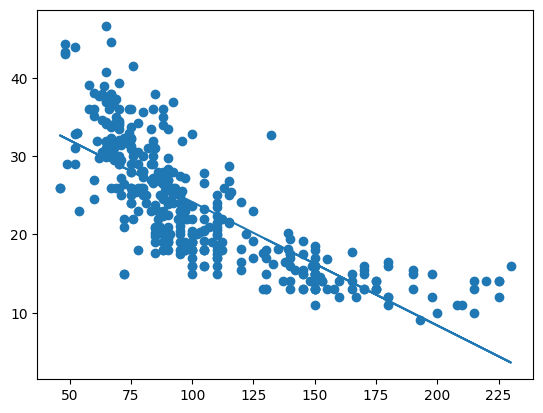

In [20]:
import matplotlib.pyplot as plt

X = auto_df['horsepower']

# Scatter plot ของ x และ y
plt.scatter(X, y)

# เส้นของ linear regression
plt.plot(X, ypred);